**Problem Statement**

Twitter has now become a useful way to build one's business as it helps in giving the brand a voice and a personality. The platform is also a quick, easy and inexpensive way to gain valuable insight from the desired audience. Identifying the sentiments about the product/brand can help the business take better actions.

You have with you evaluated tweets about multiple brands. The evaluators(random audience) were asked if the tweet expressed positive, negative, or no emotion towards a product/brand and labelled accordingly.

**Dataset Description**

This dataset contains around 7k tweet text with the sentiment label.

The file train.csv has 3 columns

tweet_id - Unique id for tweets. tweet - Tweet about the brand/product sentiment - 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment Analysis Hackathon/Data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment Analysis Hackathon/Data/test.csv')

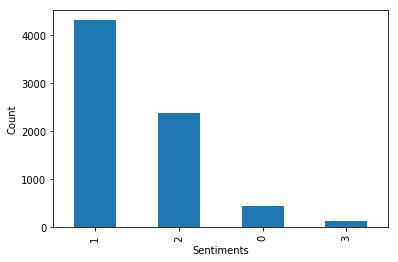

In [0]:
train["sentiment"].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

From the above graph we can see that the target variable sentiment is imbalanced.

In [0]:
text = train["tweet"].tolist()+test["tweet"].tolist()

**Topic Modelling**

In [0]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import operator
nltk.download('wordnet')

tokenizer = RegexpTokenizer(r'\w+')

en_stop = list(stopwords.words('english')) + ['mention','link','rt','quot']

Lema = WordNetLemmatizer()

Texts = []
Text = []
for i in text:
    i = str(i)
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    lemmatized_tokens = [Lema.lemmatize(i) for i in stopped_tokens]
    Text.append(lemmatized_tokens)
    BoW_dict = dict(Counter(lemmatized_tokens))
    sorted_d = sorted(BoW_dict.items(), key=operator.itemgetter(1), reverse=True)
    Texts.append(sorted_d)
print(Texts) 
print("\nTop 10 words:\n", sorted_d[:10])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[[('sxswnui', 1), ('sxsw', 1), ('apple', 1), ('defining', 1), ('language', 1), ('touch', 1), ('different', 1), ('dialect', 1), ('becoming', 1), ('smaller', 1)], [('doodle', 2), ('learning', 1), ('ab', 1), ('google', 1), ('light', 1), ('funny', 1), ('amp', 1), ('innovative', 1), ('exception', 1), ('significant', 1), ('occasion', 1), ('googledoodle', 1), ('sxsw', 1)], [('one', 1), ('face', 1), ('ex', 1), ('stealing', 1), ('show', 1), ('yr', 1), ('sxsw', 1), ('apple', 1), ('school', 1), ('mkt', 1), ('expert', 1)], [('iphone', 1), ('sxsw', 1), ('app', 1), ('would', 1), ('b', 1), ('pretty', 1), ('awesome', 1), ('crash', 1), ('every', 1), ('10mins', 1), ('extended', 1), ('browsing', 1), ('fuckit', 1), ('illmakeitwork', 1)], [('line', 1), ('outside', 1), ('apple', 1), ('store', 1), ('austin', 1), ('waiting', 1), ('new', 1), ('ipad', 1), ('sxsw', 1)], [('apple', 2), ('sxsw', 2), (

In [0]:
from collections import Counter
import operator
import numpy as np
import nltk
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')  
nltk.download('averaged_perceptron_tagger')

#Extracting the top 10 words with their count
top_10 = sorted_d[:10]

#Storing only the top 10 words
top_words=[]
for x in top_10:
    top_words.append(x[0])


#Code begins

# Joining the list back to sentences
BoW_joined = " ".join(lemmatized_tokens)

# Converting the data to textblob
blob = TextBlob(BoW_joined)

# Print the first 10 tags
print("First 10 tags:\n" ,blob.tags[:10])

#Extracting the tags
tags = blob.tags

#Initialising an empty list
nouns = []

#Extracing the words with NN tags
for x in tags:
    if x[1]=="NN":
        nouns.append(x[0])
        

#Comparing the two lists to extract the common elements        
top_nouns=[x for x in nouns if x in top_words]
top_nouns  = list(set(top_nouns))

print("\nTop Nouns:", top_nouns)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
First 10 tags:
 [('privacy', 'NN'), ('could', 'MD'), ('headline', 'VB'), ('google', 'JJ'), ('circle', 'NN'), ('social', 'JJ'), ('network', 'NN'), ('reveal', 'NN'), ('later', 'RB'), ('today', 'NN')]

Top Nouns: ['network', 'circle', 'reveal', 'privacy', 'today']


In [0]:
from gensim import corpora, models
dictionary = corpora.Dictionary(Text)
print(dictionary)
print(dictionary.token2id)

Dictionary(8942 unique tokens: ['apple', 'becoming', 'defining', 'dialect', 'different']...)
{'apple': 0, 'becoming': 1, 'defining': 2, 'dialect': 3, 'different': 4, 'language': 5, 'smaller': 6, 'sxsw': 7, 'sxswnui': 8, 'touch': 9, 'ab': 10, 'amp': 11, 'doodle': 12, 'exception': 13, 'funny': 14, 'google': 15, 'googledoodle': 16, 'innovative': 17, 'learning': 18, 'light': 19, 'occasion': 20, 'significant': 21, 'ex': 22, 'expert': 23, 'face': 24, 'mkt': 25, 'one': 26, 'school': 27, 'show': 28, 'stealing': 29, 'yr': 30, '10mins': 31, 'app': 32, 'awesome': 33, 'b': 34, 'browsing': 35, 'crash': 36, 'every': 37, 'extended': 38, 'fuckit': 39, 'illmakeitwork': 40, 'iphone': 41, 'pretty': 42, 'would': 43, 'austin': 44, 'ipad': 45, 'line': 46, 'new': 47, 'outside': 48, 'store': 49, 'waiting': 50, '2': 51, 'awaits': 52, 'dude': 53, 'ipad_2': 54, 'lone': 55, 'tablet': 56, 'tech': 57, 'tech_news': 58, 'technews': 59, 'ûªs': 60, 'npr': 61, 'prince': 62, 'shopping': 63, 'tip': 64, 'toy': 65, 'video':

In [0]:
corpus = [dictionary.doc2bow(text) for text in Text]
for line in corpus:
    print(line)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
[(7, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
[(0, 1), (7, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]
[(7, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)]
[(0, 1), (7, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]
[(0, 2), (7, 2), (26, 1), (45, 1), (49, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)]
[(7, 2), (45, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)]
[(7, 1), (32, 1), (41, 1), (47, 1), (49, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)]
[(7, 1), (75, 1), (76, 1), (77, 1), (78, 1)]
[(7, 1), (45, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)]
[(7, 2), (32, 1), (41, 1), (45, 1), (80,

In [0]:
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

print(ldamodel)

LdaModel(num_terms=8942, num_topics=3, decay=0.5, chunksize=2000)


In [0]:
for topic in ldamodel.print_topics(num_topics=3, num_words=3):
    print(topic)

(0, '0.095*"sxsw" + 0.058*"apple" + 0.044*"ipad"')
(1, '0.089*"sxsw" + 0.029*"iphone" + 0.023*"google"')
(2, '0.082*"sxsw" + 0.067*"google" + 0.027*"new"')


**Back to Sentiment Analysis**

In [0]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import TweetTokenizer

from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
add_stopwords = ['ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'mightn',"mightn't",'not']
for i in add_stopwords :
  stop_words.remove(i)
t = TweetTokenizer()

custom = stop_words+list(punctuation)+list('#sxsw')
from nltk.stem import WordNetLemmatizer,PorterStemmer
wordnet_lemmatizer = WordNetLemmatizer()
porter = PorterStemmer() 

nltk.download('wordnet')
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer('english')
import warnings
warnings.filterwarnings("ignore")
def my_tokenizer(s):
    s = str(s)
    s = s.lower()
    s=s.replace('___',"")
    #s=s.replace('#sxsw',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', s)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokens = t.tokenize(s)
    tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
    tokens = [porter.stem(t) for t in tokens] 
    tokens = [t for t in tokens if t not in custom] #remove stopwords and punctuation
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
    return tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Here we defined a funtion for data clening which first lower cases all the text because Now, NOW, now are considered as different word and it help in reducing the number of columns.
Now we're removing puntuation, stopwords, words having length less than 2 characters, digits and lemmatizing words.

In [0]:
final_text = []
for x in text:
    final_text.append(my_tokenizer(x))

In [0]:
final_text = [' '.join(x) for x in final_text]

Now we can use this data for vectorizing.

In [0]:
df = pd.DataFrame(final_text, columns = ["text"])

In [0]:
train_new = pd.DataFrame(df[:7274], columns = ['text'])
train_new['sentiment'] = train['sentiment']

In [0]:
train_new['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

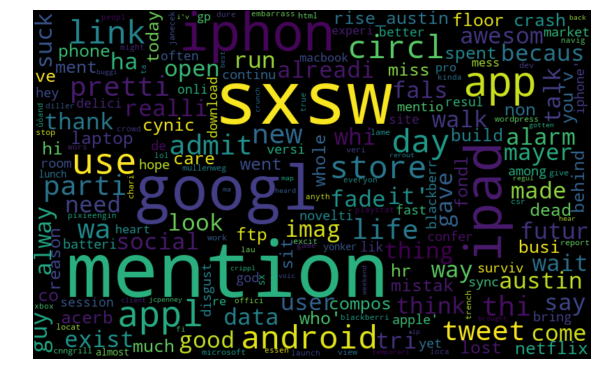

In [0]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
wordcloud_0 = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(train_new[train_new['sentiment'] == 0]['text']))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_0, interpolation="bilinear")
plt.axis('off')
plt.show()

Word Cloud showing frequency for most frequent words for sentiment 0 ie Negative

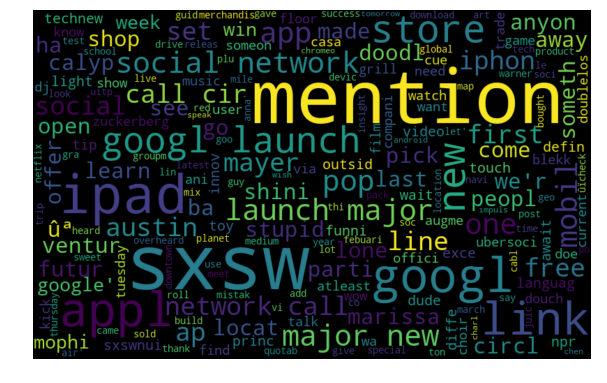

In [0]:
wordcloud_1 = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(train_new[train_new['sentiment'] == 1]['text']))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis('off')
plt.show()

Word Cloud showing frequency for most frequent words for sentiment 1 ie Nutral

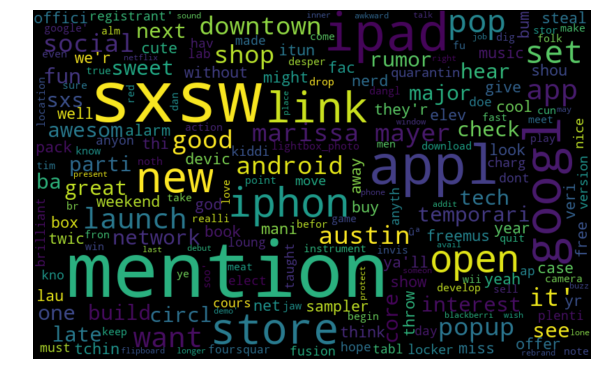

In [0]:
wordcloud_2 = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(train_new[train_new['sentiment'] == 2]['text']))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis('off')
plt.show()

Word Cloud showing frequency for most frequent words for sentiment 2 ie Positive

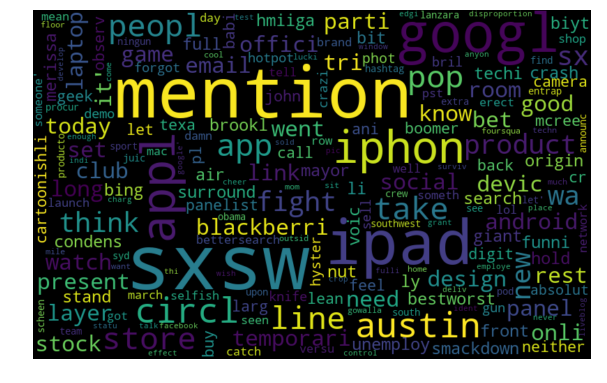

In [0]:
wordcloud_3 = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(train_new[train_new['sentiment'] == 3]['text']))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_3, interpolation="bilinear")
plt.axis('off')
plt.show()

Word Cloud showing frequency for most frequent words for sentiment 3 ie Cant Tell

In [0]:
X = df['text']

To models we cannot feed text data, therefore we've to convert this text data to vectors. For doing so there are different ways possible such as count vectorizer, TFIDF vectorizer, etc.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

In [0]:
X = tfidf.fit_transform(X)

In [0]:
X_array = X.toarray()

In [0]:
X_array.shape

(9093, 6943)

In [0]:
ada_train = X_array[:7274].tolist()
ada_test = X_array[7274:].tolist()

In [0]:
train_features = pd.DataFrame(X_array[:7274])
df_X_train = train_features[:]

In [0]:
df_X_train.shape

(7274, 6943)

In [0]:
test_features = pd.DataFrame(X_array[7274:])
df_X_test = test_features[:]

In [0]:
df_X_test.shape

(1819, 6943)

In [0]:
df_y_train = train['sentiment']

In [0]:
df = pd.DataFrame(df_X_train)
df['sentiment'] = df_y_train
X = df.drop(columns = ['sentiment'])
y = df['sentiment']

In [0]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.metrics import f1_score, classification_report
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state = 42)
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [0]:
y_pred = svm.predict(X_test)

In [0]:
print('Classification Report of LinearSVC :', classification_report(y_test, y_pred))

Classification Report of LinearSVC :               precision    recall  f1-score   support

           0       0.51      0.27      0.36        77
           1       0.72      0.82      0.77       871
           2       0.58      0.50      0.54       483
           3       0.00      0.00      0.00        24

    accuracy                           0.67      1455
   macro avg       0.45      0.40      0.42      1455
weighted avg       0.65      0.67      0.66      1455



In [0]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight = 'balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log = log_reg.predict(X_test)

In [0]:
print('Classification Report of Logistic Regression :', classification_report(y_test, y_pred_log))

Classification Report of Logistic Regression :               precision    recall  f1-score   support

           0       0.40      0.44      0.42        77
           1       0.71      0.79      0.74       871
           2       0.58      0.46      0.51       483
           3       0.00      0.00      0.00        24

    accuracy                           0.65      1455
   macro avg       0.42      0.42      0.42      1455
weighted avg       0.64      0.65      0.64      1455



In [0]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 100)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred_deci = decision_tree.predict(X_test)

In [0]:
print('Classification Report of Decision Tree :', classification_report(y_test, y_pred_deci))

Classification Report of Decision Tree :               precision    recall  f1-score   support

           0       0.24      0.27      0.26        77
           1       0.67      0.75      0.71       871
           2       0.48      0.38      0.42       483
           3       0.00      0.00      0.00        24

    accuracy                           0.59      1455
   macro avg       0.35      0.35      0.35      1455
weighted avg       0.57      0.59      0.58      1455



In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1, class_weight = 'balanced_subsample', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [0]:
y_pred_rfc = rfc.predict(X_test)

In [0]:
print('Classification Report of Random Forest :', classification_report(y_test, y_pred_rfc))

Classification Report of Random Forest :               precision    recall  f1-score   support

           0       0.61      0.22      0.32        77
           1       0.67      0.89      0.76       871
           2       0.63      0.34      0.44       483
           3       0.00      0.00      0.00        24

    accuracy                           0.66      1455
   macro avg       0.48      0.36      0.38      1455
weighted avg       0.64      0.66      0.62      1455



In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada_linear_svc = LinearSVC()
adaboost = AdaBoostClassifier(base_estimator = ada_linear_svc, n_estimators = 100, algorithm = 'SAMME', random_state = 42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                            fit_intercept=True,
                                            intercept_scaling=1,
                                            loss='squared_hinge', max_iter=1000,
                                            multi_class='ovr', penalty='l2',
                                            random_state=None, tol=0.0001,
                                            verbose=0),
                   learning_rate=1.0, n_estimators=100, random_state=42)

In [0]:
y_pred_adaboost = adaboost.predict(X_test)

In [0]:
print('Classification Report of AdaBoost Classifier :\n\n', classification_report(y_test, y_pred_adaboost))

Classification Report of AdaBoost Classifier :

               precision    recall  f1-score   support

           0       0.51      0.27      0.36        77
           1       0.72      0.82      0.77       871
           2       0.58      0.50      0.54       483
           3       0.00      0.00      0.00        24

    accuracy                           0.67      1455
   macro avg       0.45      0.40      0.42      1455
weighted avg       0.65      0.67      0.66      1455



In [0]:
ada_linear_svc_whole = LinearSVC()
adaboost_whole = AdaBoostClassifier(base_estimator = ada_linear_svc_whole, n_estimators = 100, algorithm = 'SAMME', random_state = 42)
adaboost_whole.fit(ada_train, train['sentiment'])

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                            fit_intercept=True,
                                            intercept_scaling=1,
                                            loss='squared_hinge', max_iter=1000,
                                            multi_class='ovr', penalty='l2',
                                            random_state=None, tol=0.0001,
                                            verbose=0),
                   learning_rate=1.0, n_estimators=100, random_state=42)

In [0]:
y_pred_adaboost_whole = adaboost_whole.predict(ada_test)

In [0]:
submission = pd.DataFrame({
        "tweet_id": test['tweet_id'],
        "sentiment": y_pred_adaboost_whole
    })

In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Sentiment Analysis Hackathon/submission.csv', index=False)